In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [53]:
import matplotlib.pyplot as plt

In [4]:
n=pd.read_csv('Combined.csv', low_memory=False)

In [36]:
n.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1215890 entries, 0 to 1215889
Data columns (total 52 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Unnamed: 0   1215890 non-null  int64  
 1   Seq          1215890 non-null  int64  
 2   Dur          1215890 non-null  float64
 3   RunTime      1215890 non-null  float64
 4   Mean         1215890 non-null  float64
 5   Sum          1215890 non-null  float64
 6   Min          1215890 non-null  float64
 7   Max          1215890 non-null  float64
 8   Proto        1215890 non-null  object 
 9   sTos         1215676 non-null  float64
 10  dTos         272823 non-null   float64
 11  sDSb         1215676 non-null  object 
 12  dDSb         272823 non-null   object 
 13  sTtl         1215676 non-null  float64
 14  dTtl         272823 non-null   float64
 15  sHops        1215676 non-null  float64
 16  dHops        272823 non-null   float64
 17  Cause        1215890 non-null  object 
 18  To

In [37]:
n['Proto'].unique()

array(['icmp', 'udp', 'tcp', 'sctp', 'arp', 'llc', 'lldp', 'ipv6-icmp'],
      dtype=object)

In [39]:
n['Proto'].value_counts()

Proto
udp          903040
tcp          278671
icmp          29636
sctp           4327
lldp            115
llc              58
arp              41
ipv6-icmp         2
Name: count, dtype: int64

In [40]:
n['sDSb'].value_counts()

sDSb
cs0     1209216
ef         3538
af11        789
cs6         640
cs7         528
af41        515
52          144
af12        137
cs4          93
4            74
39            1
54            1
Name: count, dtype: int64

In [41]:
n['dDSb'].value_counts()

dDSb
cs0     267523
ef        3464
af11      1413
af12       390
cs1         32
cs4          1
Name: count, dtype: int64

In [42]:
n['Cause'].value_counts()

Cause
Status      728665
Start       486523
Shutdown       702
Name: count, dtype: int64

In [43]:
n['State'].value_counts()

State
REQ    589299
INT    328746
CON    132174
RST     75670
FIN     59181
ECO     28822
ACC      1109
URP       786
RSP        73
TST        28
NRS         2
Name: count, dtype: int64

In [44]:
n['Label'].value_counts()

Label
Malicious    738153
Benign       477737
Name: count, dtype: int64

In [45]:
n['Attack Type'].value_counts()

Attack Type
Benign            477737
UDPFlood          457340
HTTPFlood         140812
SlowrateDoS        73124
TCPConnectScan     20052
SYNScan            20043
UDPScan            15906
SYNFlood            9721
ICMPFlood           1155
Name: count, dtype: int64

In [46]:
n['Attack Tool'].value_counts()

Attack Tool
Benign        477737
Hping3        468216
Goldeneye     140812
Torshammer     59870
Nmap           56001
Slowloris      13254
Name: count, dtype: int64

In [49]:
categorical_cols = n.select_dtypes('object').columns
categorical_cols[:-3]

Index(['Proto', 'sDSb', 'dDSb', 'Cause', 'State'], dtype='object')

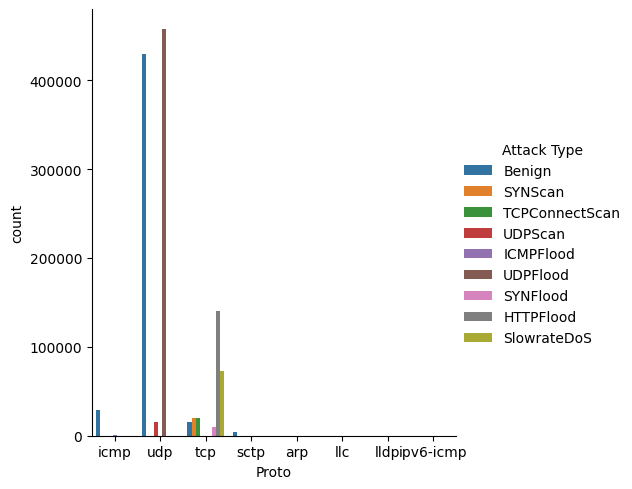

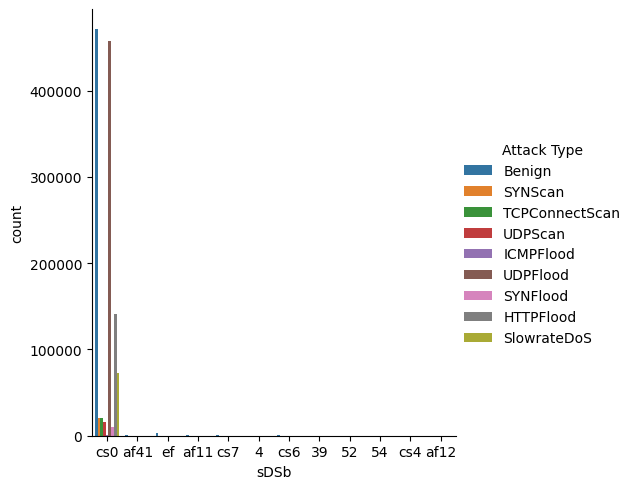

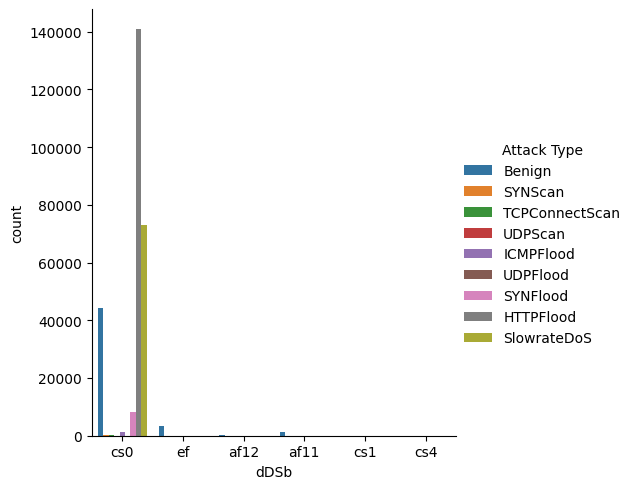

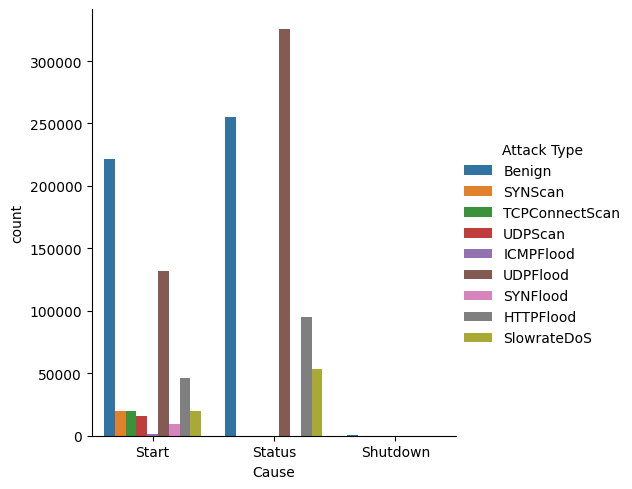

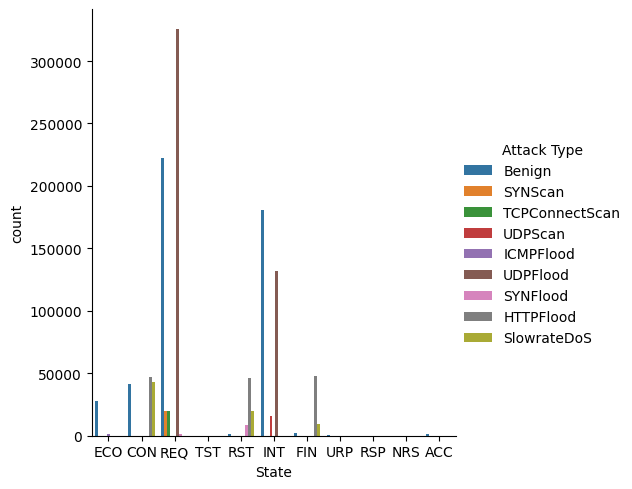

In [55]:
for col in categorical_cols[:-3]:
    sns.catplot(x=col, data=n, kind='count', hue='Attack Type')
    plt.show()

In [62]:
for col in categorical_cols[:-3]:
    print(n.groupby([col, 'Attack Type'])['Attack Type'].count().sort_values())
    print()

Proto      Attack Type   
ipv6-icmp  Benign                 2
icmp       UDPScan               16
           SYNScan               20
           TCPConnectScan        20
arp        Benign                41
tcp        UDPScan               41
llc        Benign                58
lldp       Benign               115
icmp       ICMPFlood           1155
sctp       Benign              4327
tcp        SYNFlood            9721
           Benign             14918
udp        UDPScan            15849
tcp        SYNScan            20023
           TCPConnectScan     20032
icmp       Benign             28425
tcp        SlowrateDoS        73124
           HTTPFlood         140812
udp        Benign            429851
           UDPFlood          457340
Name: Attack Type, dtype: int64

sDSb  Attack Type   
39    Benign                 1
54    Benign                 1
4     Benign                74
cs4   Benign                93
af12  Benign               137
52    Benign               144
af41  Benign  

In [22]:
proto_dummies = pd.get_dummies(n.Proto, dtype=int, prefix='Proto')

In [26]:
proto_dummies

,Proto_arp,Proto_icmp,Proto_llc,Proto_lldp,Proto_sctp,Proto_tcp,Proto_udp
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1
4,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...
1215885,0,0,0,0,1,0,0
1215886,0,0,0,0,1,0,0
1215887,0,0,0,0,0,1,0
1215888,0,0,0,0,1,0,0


In [24]:
proto_dummies.drop(columns=['Proto_ipv6-icmp'], inplace=True)

In [14]:
sDSb_dummies = pd.get_dummies(n.sDSb, dtype=int, prefix='sDSb')

In [27]:
sDSb_dummies

,sDSb_52,sDSb_af11,sDSb_af12,sDSb_af41,sDSb_cs0,sDSb_cs6,sDSb_cs7,sDSb_ef
0,0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0,0
2,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...
1215885,0,0,0,0,0,0,0,1
1215886,0,0,0,0,0,0,0,1
1215887,0,0,0,0,1,0,0,0
1215888,0,0,0,0,0,0,0,1


In [17]:
sDSb_dummies.drop(columns=['sDSb_39','sDSb_54', 'sDSb_4', 'sDSb_cs4'], inplace=True)

In [29]:
dDSb_dummies = pd.get_dummies(n.dDSb, dtype=int, prefix='dDSb')
dDSb_dummies

,dDSb_af11,dDSb_af12,dDSb_cs0,dDSb_cs1,dDSb_cs4,dDSb_ef
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
1215885,0,0,0,0,0,1
1215886,1,0,0,0,0,0
1215887,0,0,1,0,0,0
1215888,1,0,0,0,0,0


In [34]:
dDSb_dummies.drop(columns=['dDSb_cs4'], inplace=True)

In [30]:
Cause_dummies = pd.get_dummies(n.Cause, dtype=int, prefix='Cause')
Cause_dummies

,Cause_Shutdown,Cause_Start,Cause_Status
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1215885,0,0,1
1215886,0,0,1
1215887,0,1,0
1215888,0,0,1


In [35]:
Cause_dummies.drop(columns=['Cause_Shutdown'], inplace=True)

In [31]:
State_dummies = pd.get_dummies(n.State, dtype=int, prefix='State')
State_dummies

,State_ACC,State_CON,State_ECO,State_FIN,State_INT,State_NRS,State_REQ,State_RSP,State_RST,State_TST,State_URP
0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1215885,0,1,0,0,0,0,0,0,0,0,0
1215886,0,1,0,0,0,0,0,0,0,0,0
1215887,0,1,0,0,0,0,0,0,0,0,0
1215888,0,1,0,0,0,0,0,0,0,0,0


In [36]:
State_dummies.drop(columns=['State_RSP','State_TST','State_NRS'], inplace=True)

In [37]:
attType_dummies = pd.get_dummies(n['Attack Type'], dtype=int, prefix='AtkType')

In [38]:
attType_dummies

,AtkType_Benign,AtkType_HTTPFlood,AtkType_ICMPFlood,AtkType_SYNFlood,AtkType_SYNScan,AtkType_SlowrateDoS,AtkType_TCPConnectScan,AtkType_UDPFlood,AtkType_UDPScan
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
1215885,1,0,0,0,0,0,0,0,0
1215886,1,0,0,0,0,0,0,0,0
1215887,1,0,0,0,0,0,0,0,0
1215888,1,0,0,0,0,0,0,0,0


In [39]:
atkTool_dummies = pd.get_dummies(n['Attack Tool'], dtype=int, prefix='AtkTool')
atkTool_dummies

,AtkTool_Benign,AtkTool_Goldeneye,AtkTool_Hping3,AtkTool_Nmap,AtkTool_Slowloris,AtkTool_Torshammer
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,1,0,0,0,0,0
3,1,0,0,0,0,0
4,1,0,0,0,0,0
...,...,...,...,...,...,...
1215885,1,0,0,0,0,0
1215886,1,0,0,0,0,0
1215887,1,0,0,0,0,0
1215888,1,0,0,0,0,0


In [40]:
Label_dummies = pd.get_dummies(n.Label, dtype=int, prefix='Label')
Label_dummies

,Label_Benign,Label_Malicious
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0
...,...,...
1215885,1,0
1215886,1,0
1215887,1,0
1215888,1,0


In [66]:
merged = pd.concat([n, proto_dummies, sDSb_dummies, dDSb_dummies, Cause_dummies, State_dummies, atkTool_dummies, attType_dummies, Label_dummies], axis='columns')
merged

,Unnamed: 0,Seq,Dur,RunTime,Mean,Sum,Min,Max,Proto,sTos,...,AtkType_HTTPFlood,AtkType_ICMPFlood,AtkType_SYNFlood,AtkType_SYNScan,AtkType_SlowrateDoS,AtkType_TCPConnectScan,AtkType_UDPFlood,AtkType_UDPScan,Label_Benign,Label_Malicious
0,0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,0,0,0,0,0,0,0,0,1,0
1,1,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,icmp,0.0,...,0,0,0,0,0,0,0,0,1,0
2,2,3,4.998020,4.998020,4.998020,4.998020,4.998020,4.998020,udp,0.0,...,0,0,0,0,0,0,0,0,1,0
3,3,4,4.998037,4.998037,4.998037,4.998037,4.998037,4.998037,udp,0.0,...,0,0,0,0,0,0,0,0,1,0
4,4,5,4.999453,4.999453,4.999453,4.999453,4.999453,4.999453,udp,0.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215885,487569,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,sctp,186.0,...,0,0,0,0,0,0,0,0,1,0
1215886,487570,3,0.235607,0.235607,0.235607,0.235607,0.235607,0.235607,sctp,186.0,...,0,0,0,0,0,0,0,0,1,0
1215887,487571,764,0.099927,0.099927,0.099927,0.099927,0.099927,0.099927,tcp,0.0,...,0,0,0,0,0,0,0,0,1,0
1215888,487572,3,1.307852,1.307852,1.307852,1.307852,1.307852,1.307852,sctp,186.0,...,0,0,0,0,0,0,0,0,1,0


In [65]:
merged = merged.drop(columns=['Unnamed: 0'], inplace=True)

AttributeError: 'NoneType' object has no attribute 'drop'

In [64]:
merged

In [61]:
merged.columns.tolist()

['Unnamed: 0',
 'Seq',
 'Dur',
 'RunTime',
 'Mean',
 'Sum',
 'Min',
 'Max',
 'sTos',
 'dTos',
 'sTtl',
 'dTtl',
 'sHops',
 'dHops',
 'TotPkts',
 'SrcPkts',
 'DstPkts',
 'TotBytes',
 'SrcBytes',
 'DstBytes',
 'Offset',
 'sMeanPktSz',
 'dMeanPktSz',
 'Load',
 'SrcLoad',
 'DstLoad',
 'Loss',
 'SrcLoss',
 'DstLoss',
 'pLoss',
 'SrcGap',
 'DstGap',
 'Rate',
 'SrcRate',
 'DstRate',
 'SrcWin',
 'DstWin',
 'sVid',
 'dVid',
 'SrcTCPBase',
 'DstTCPBase',
 'TcpRtt',
 'SynAck',
 'AckDat',
 'Proto_arp',
 'Proto_icmp',
 'Proto_llc',
 'Proto_lldp',
 'Proto_sctp',
 'Proto_tcp',
 'Proto_udp',
 'sDSb_52',
 'sDSb_af11',
 'sDSb_af12',
 'sDSb_af41',
 'sDSb_cs0',
 'sDSb_cs6',
 'sDSb_cs7',
 'sDSb_ef',
 'dDSb_af11',
 'dDSb_af12',
 'dDSb_cs0',
 'dDSb_cs1',
 'dDSb_ef',
 'Cause_Start',
 'Cause_Status',
 'State_ACC',
 'State_CON',
 'State_ECO',
 'State_FIN',
 'State_INT',
 'State_REQ',
 'State_RST',
 'State_URP',
 'AtkTool_Benign',
 'AtkTool_Goldeneye',
 'AtkTool_Hping3',
 'AtkTool_Nmap',
 'AtkTool_Slowloris',
 '

In [67]:
file_path = "encoded5GNIDD.csv"
merged.to_csv(file_path, index=False)